## Weather Classification

### About Dataset

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

Link to dataset: [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

#### Variables

- Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
- 
Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers
- Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
- Precipitation (%) (numeric): The precipitation percentage, including outlier values.
- Cloud Cover (categorical): The cloud cover description.
- Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
- UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
- Season (categorical): The season during which the data was recorded.
- Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
- Location (categorical): The type of location where the data was recorded.
- Weather Type (categorical): The target variable for classification, indicating the weather type.

#### Important Note

This dataset is synthetically produced and does not convey real-world weather data. It includes intentional outliers to provide opportunities for practicing outlier detection and handling. The values, ranges, and distributions may not accurately represent real-world conditions, and the data should primarily be used for educational and experimental purposes.ther type.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\stlp\Downloads\weather_classification_data.csv")

### Part 1: Data Preparation

In [7]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [9]:
print(df.isna().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [11]:
# encode categorical string variables to numeric
le = LabelEncoder()

label_cloud = le.fit_transform(df['Cloud Cover'])
label_season = le.fit_transform(df['Season'])
label_location = le.fit_transform(df['Location'])
label_Class = le.fit_transform(df['Weather Type'])

In [13]:
# append labels to dataframe
df['Cloud Cover Labels'] = label_cloud
df['Season Labels'] = label_season
df['Location Labels'] = label_location
df['Weather Type Labels'] = label_Class

In [15]:
# show label mapping
cloud_map = df[['Cloud Cover', 'Cloud Cover Labels']].drop_duplicates()
season_map = df[['Season', 'Season Labels']].drop_duplicates()
location_map = df[['Location', 'Location Labels']].drop_duplicates()
weather_map = df[['Weather Type', 'Weather Type Labels']].drop_duplicates()

print(cloud_map)
print()
print(season_map)
print()
print(location_map)
print()
print(weather_map)

       Cloud Cover  Cloud Cover Labels
0    partly cloudy                   3
2            clear                   0
4         overcast                   2
134         cloudy                   1

    Season  Season Labels
0   Winter              3
1   Spring              1
5   Summer              2
11  Autumn              0

   Location  Location Labels
0    inland                1
2  mountain                2
3   coastal                0

  Weather Type  Weather Type Labels
0        Rainy                    1
1       Cloudy                    0
2        Sunny                    3
6        Snowy                    2


#### Label Encoding

- Cloud Cover Labels: 0 (clear), 1 (cloudy), 2 (overcast), 3 (partly cloudy)
- Season Labels: 0 (Autumn), 1 (Spring), 2 (Summer), 3 (Winter)
- Location Labels: 0 (Coastal), 1 (Inland), 2 (Mountain)
- Weather Type Labels: 0 (Cloudy), 1 (Rainy), 2 (Snowy), 3 (Sunny)

In [18]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover Labels,Season Labels,Location Labels,Weather Type Labels
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917,1.990227,1.849394,1.094091,1.500000
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499,1.012302,1.164824,0.791420,1.118076
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000,2.000000,1.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000,2.000000,2.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000,3.000000,3.000000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000,3.000000,3.000000,2.000000,3.000000


### Part 2: Exploratory Data Analysis

In [21]:
print(df.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Cloud Cover Labels',
       'Season Labels', 'Location Labels', 'Weather Type Labels'],
      dtype='object')


In [23]:
numeric = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index']]

In [25]:
# checking for inf values due to seaborn warning
for col in numeric.columns:
    print(f'{col}: {np.isinf(df[col]).sum()}')

Temperature: 0
Humidity: 0
Wind Speed: 0
Precipitation (%): 0
Atmospheric Pressure: 0
UV Index: 0


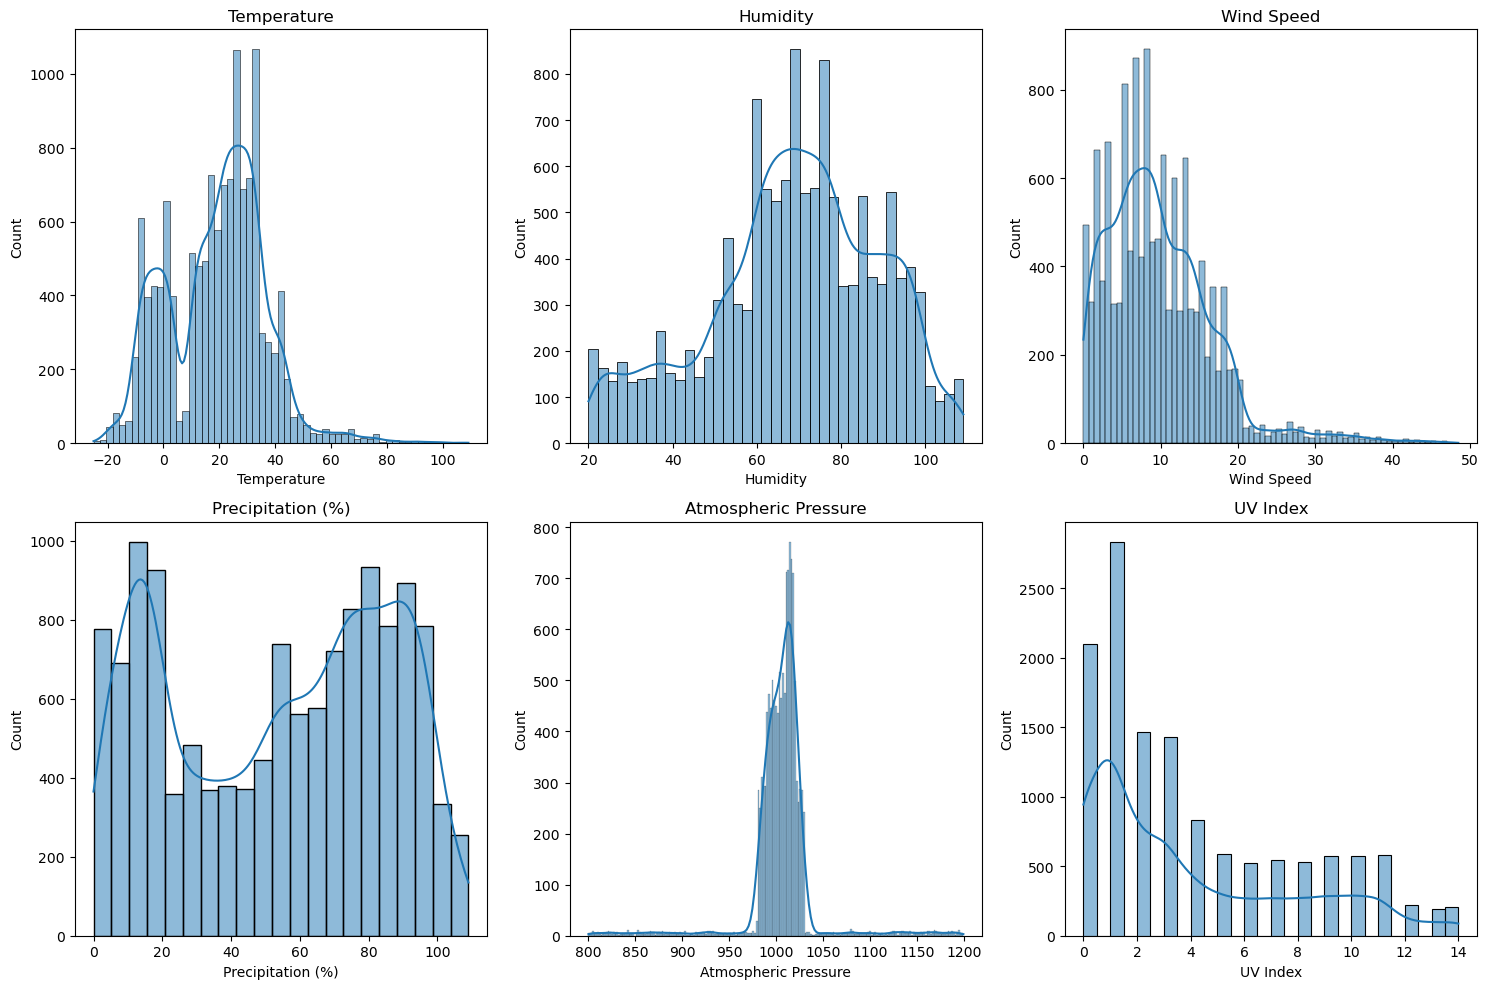

In [27]:
# no inf values in data, not sure why seaborn is throwing a warning
# plot numerical distributions
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric.columns):
    sns.histplot(data = df, x = col, kde = True, ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.savefig('WC_Distributions.png')
plt.show()

##### Observations: 
The numerical attributes have a range of distributions, with Atmospheric Pressure being the only attribute to have a seemingly 'normal' distribution.

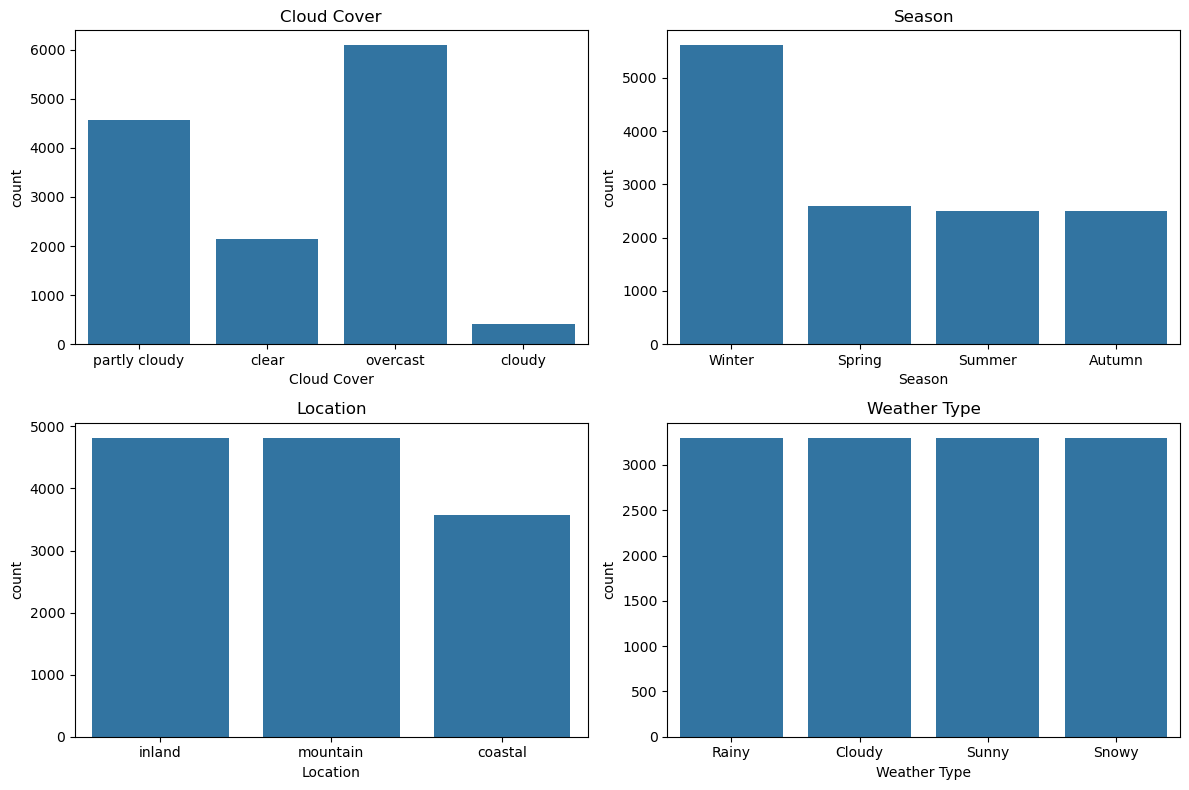

In [30]:
# plot categorical counts
cat = df[['Cloud Cover', 'Season', 'Location', 'Weather Type']]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
axes = axes.flatten()

for i, col in enumerate(cat.columns):
    sns.countplot(data = df, x = col, ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.savefig('WC_Counts.png')
plt.show()

##### Observations: 
Varying counts in categorical attributes. However, weather type has even counts accross each category. Winter is much more represented than any other season.

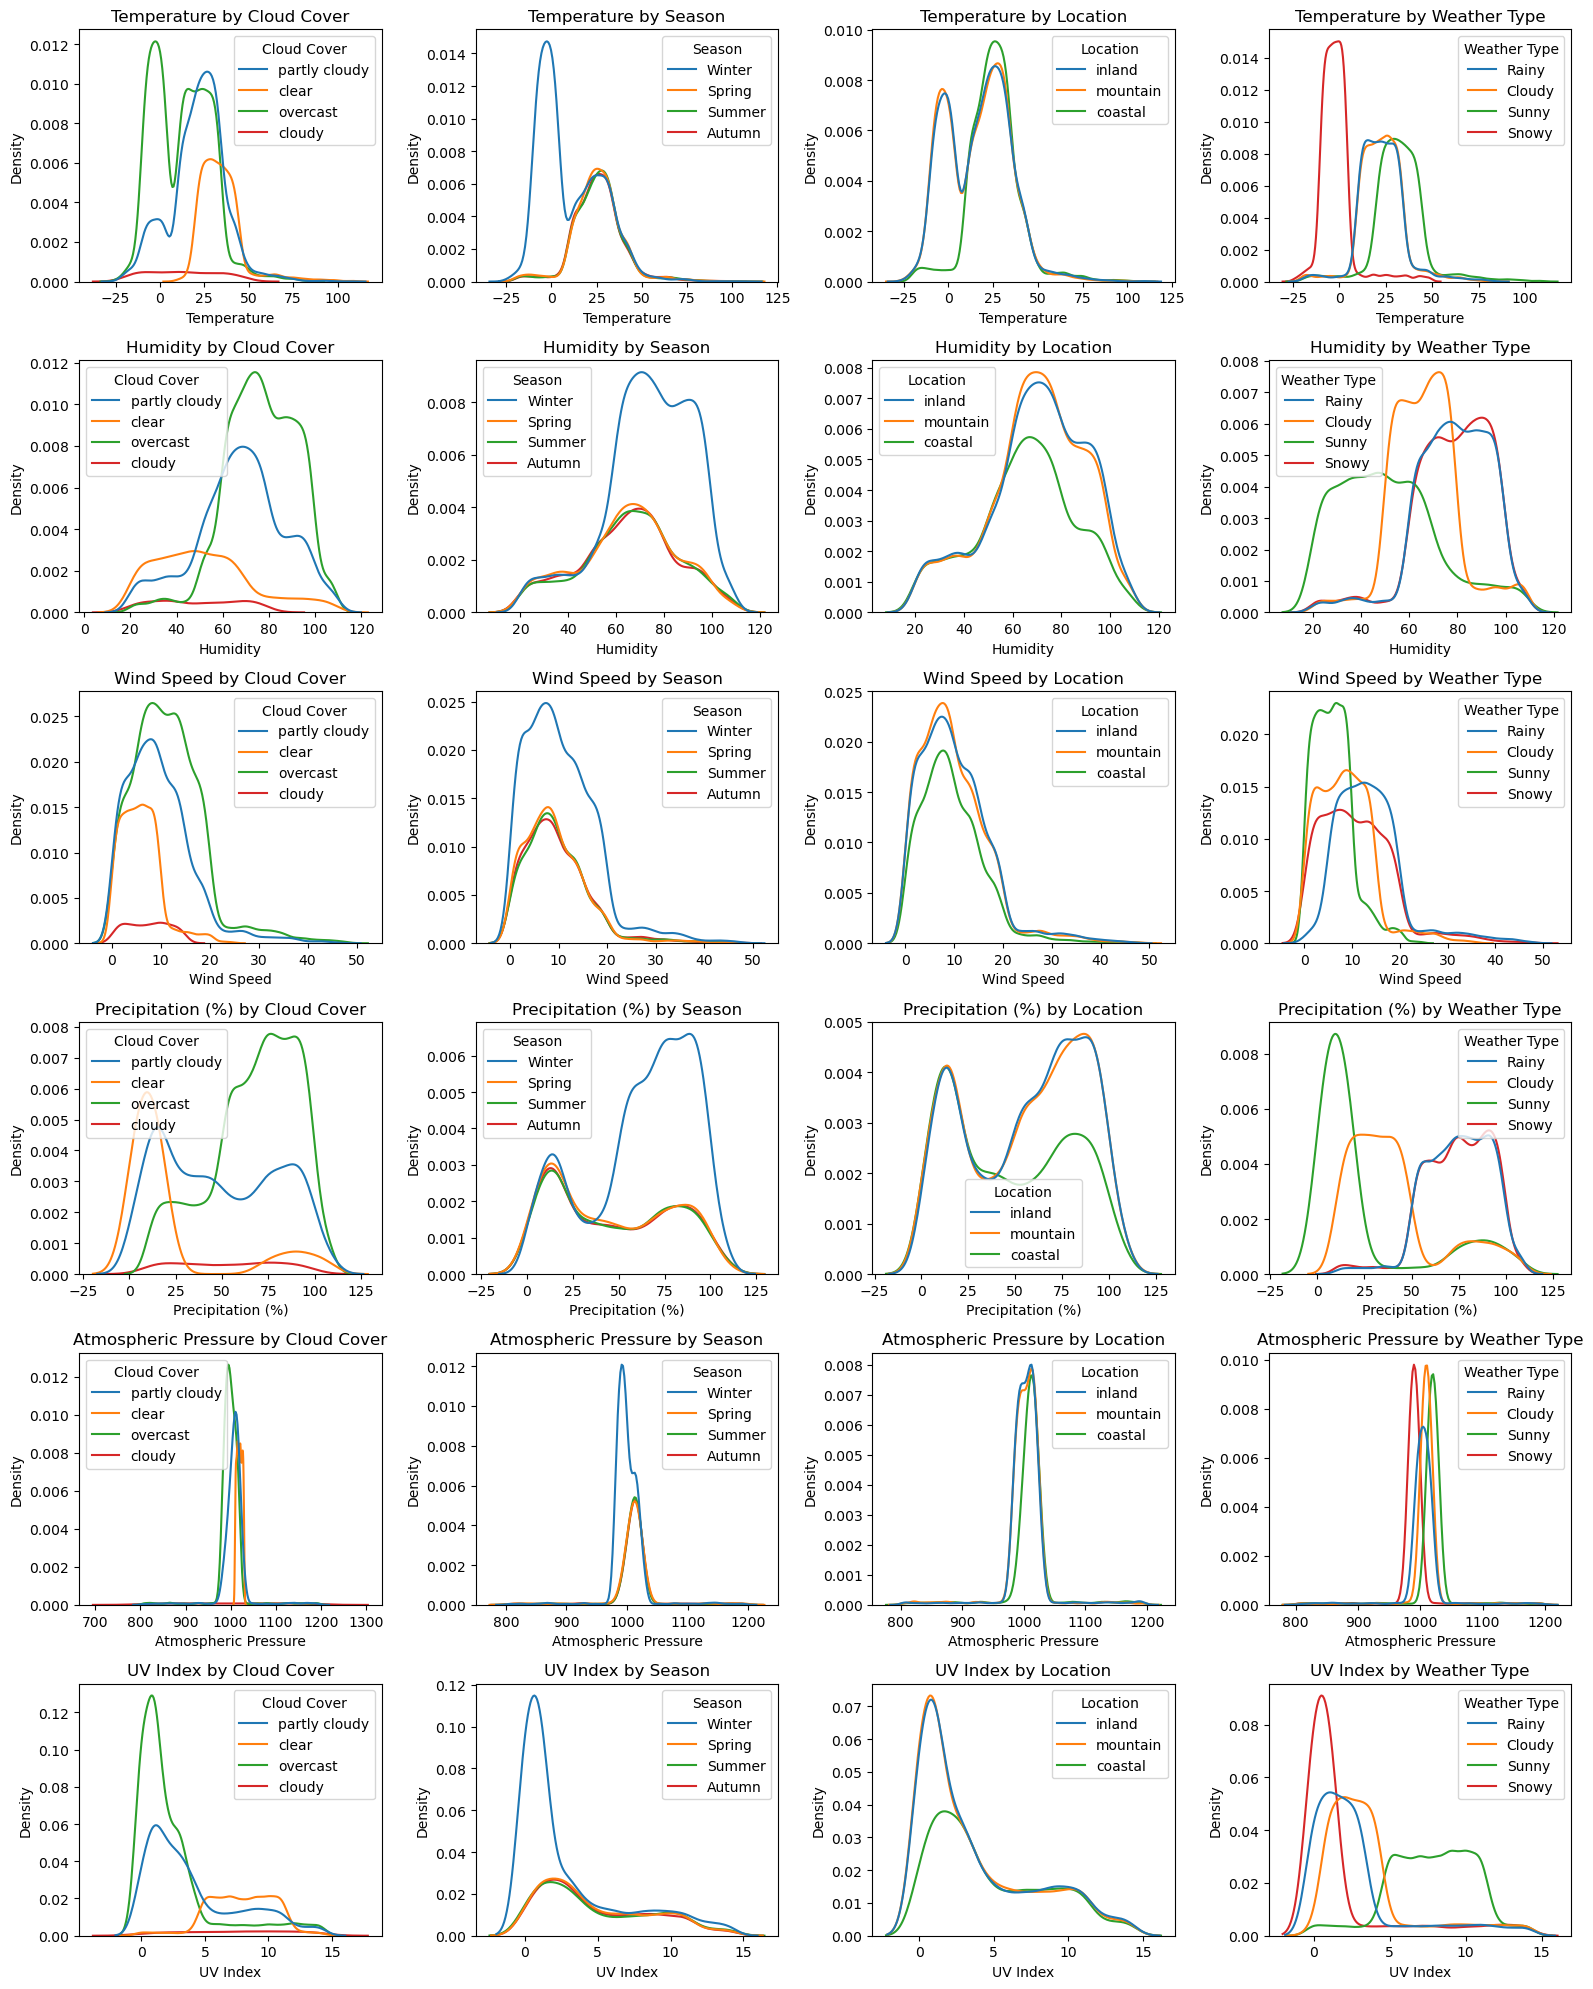

In [33]:
# plot distributions for each category
numeric = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index']]
cat = df[['Cloud Cover', 'Season', 'Location', 'Weather Type']]

fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize = (16, 20))
axes = axes.flatten()

for i, col_num in enumerate(numeric.columns):
    for j, col_cat in enumerate(cat.columns):
        ax = axes[i * len(cat.columns) + j]
        sns.kdeplot(data = df, x = col_num, hue = col_cat, ax = ax)
        ax.set_title(f'{col_num} by {col_cat}')

plt.tight_layout()
plt.savefig('WC_Distirbutions_Attribute.png')
plt.show()

##### Observations: 

This dataset presents varying types of distributions when evaluating how each numerical attribute is distributed throughout each category. Seasonal distributions tend to be more similar between Spring, Summer, and Fall. However, the seasonal distributions of Winter are vastly different. This is due to the overrepresentation of Winter within the data. 

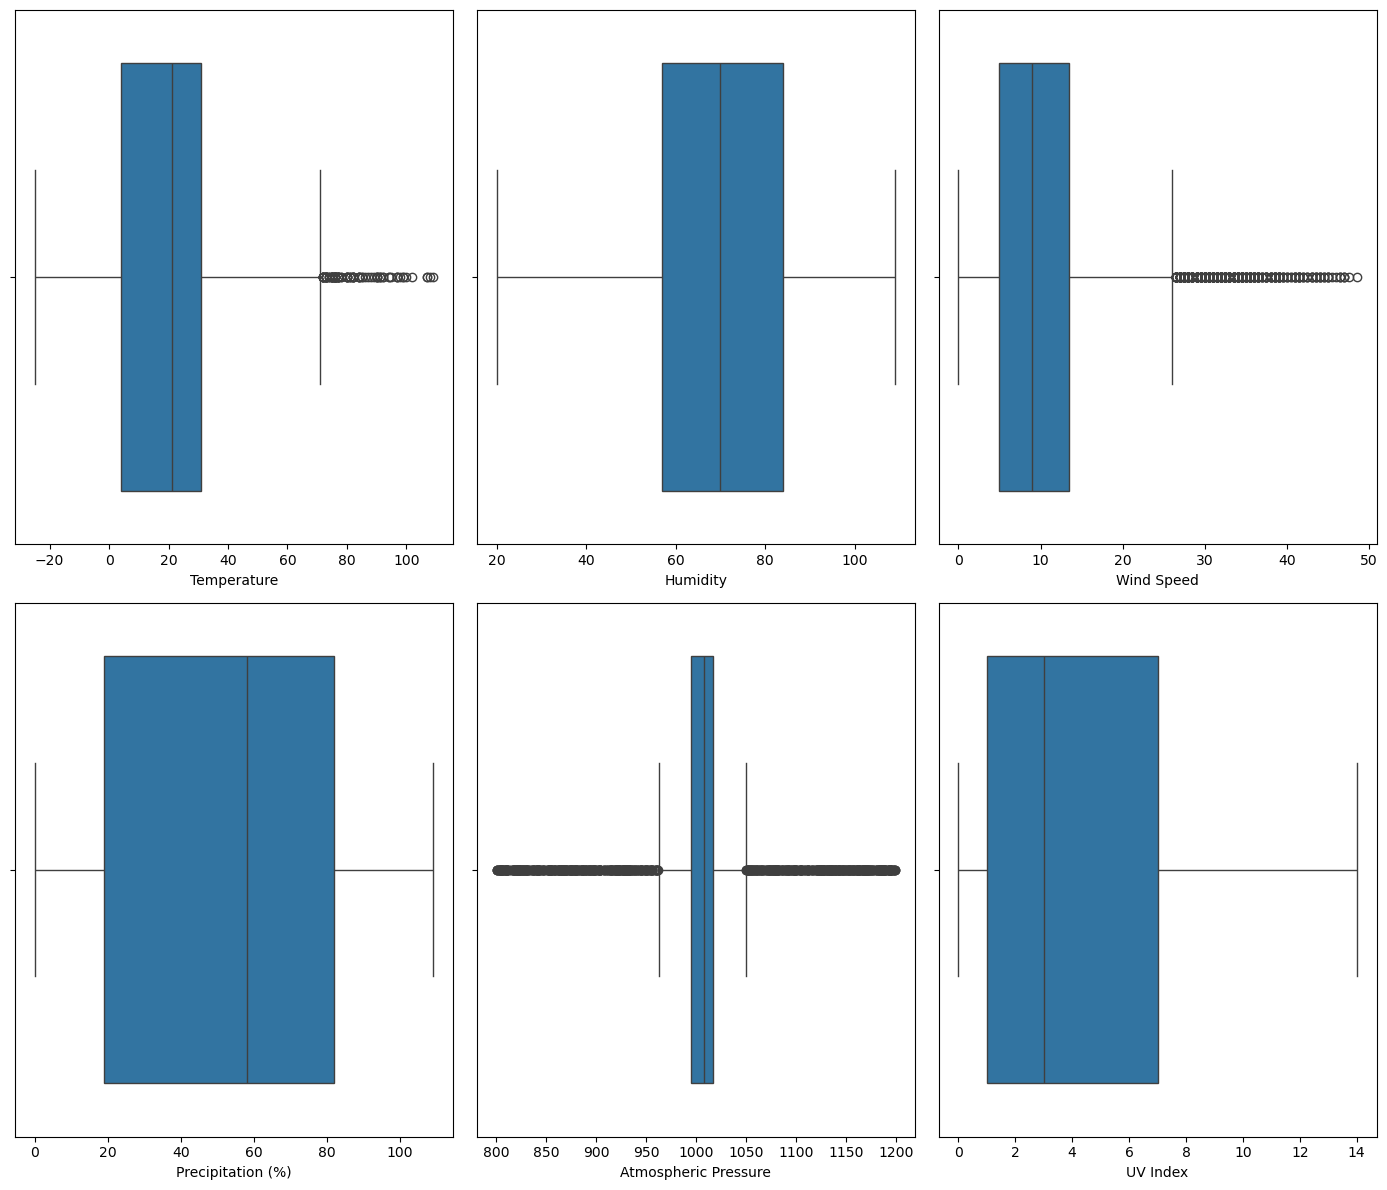

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 12))
axes = axes.flatten()

for i, col in enumerate(numeric.columns): 
    sns.boxplot(data = df, x = col, ax = axes[i])

plt.tight_layout()
plt.savefig('WC_Boxplot.png')
plt.show()

In [36]:
# outlier removal function 
# takes data frame and numerical columns of given dataframe
# returns dataframe with points beyond outlier range removed
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # inter quartile range for column
        IQR = Q3 - Q1
        # outlier bounds for column
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # remove outliers from column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

In [37]:
df_clean = remove_outliers(df, numeric)

##### Observations:

Temperature, Wind Speed, and Atmospheric Pressure appear to have a significant number of outliers within the dataset. As this is a simulated dataset, it is unclear weather or not these have been incuded to represent naturally included weather patterns or data that has been entered/reported incorrectly. However, given the effects of climate change, these values could be more indicative of future weather patterns. 

### Part 3: Weather Classification Using K-Nearest Neighbors and Support Vector Machine Classification

#### KNN

In [94]:
data1 = df.copy()
data1_clean = df_clean.copy()

In [96]:
# run KNN with entire data set and and cleaned dataset to observe model's sensitivity to outlier data
data1 = data1[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index',
       'Visibility (km)', 'Cloud Cover Labels',
       'Season Labels', 'Location Labels', 'Weather Type Labels']]

data1_clean = data1_clean[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index',
       'Visibility (km)', 'Cloud Cover Labels',
       'Season Labels', 'Location Labels', 'Weather Type Labels']]

In [98]:
scaler = StandardScaler()

x = data1.drop('Weather Type Labels', axis = 1)
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
y = data1['Weather Type Labels']

x_clean = data1_clean.drop('Weather Type Labels', axis = 1)
x_clean_scaled = scaler.fit_transform(x_clean)
x_clean = pd.DataFrame(x_clean_scaled, columns = x_clean.columns)
y_clean = data1_clean['Weather Type Labels']

In [100]:
# possible estimate for k
k_est = 30

In [102]:
# knn function
# randomly splits data into training (%70) and testing (%30)
# initializes model from k = 2 to k = estimate + 5
# model itterates 50 times with different random states
# evaluates accuracy of each iteration
# returns mean accuracy of each model
def knn_classifier(X, Y, estimate):
    mean_accuracy = []

    for j in range(2, estimate + 5):
        scores = []

        for i in range(50):
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
            
            model = KNeighborsClassifier(n_neighbors = j).fit(x_train, y_train)
            
            # predictions
            y_pred = model.predict(x_test)
            
            # add accuracy of predictions to scores
            scores.append(accuracy_score(y_test, y_pred))

        # add mean accuracy of k to mean_accuracy
        mean_accuracy.append(np.mean(scores))

    return mean_accuracy

In [107]:
knn_results = knn_classifier(x, y, k_est)
knn_results_clean = knn_classifier(x_clean, y_clean, k_est)

Standard Dataset
Optimal K Neighbors: 3
Accuracy: 0.897520202020202

Cleaned Dataset
Optimal K Neighbors: 3
Accuracy: 0.9575214163335238


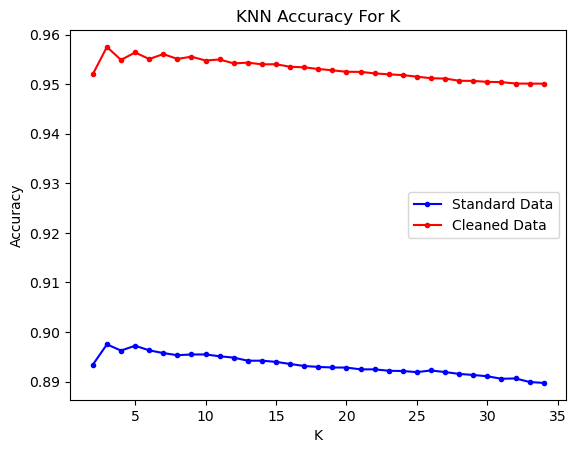

In [108]:
# visualize results
print('Standard Dataset')
print(f'Optimal K Neighbors: {(np.argmax(knn_results) + 2)}')
print('Accuracy:', np.max(knn_results))

print('\nCleaned Dataset')
print(f'Optimal K Neighbors: {(np.argmax(knn_results_clean) + 2)}')
print('Accuracy:', np.max(knn_results_clean))

x_range = range(2, k_est + 5)
plt.plot(x_range, knn_results, marker = '.', color = 'b', label = 'Standard Data')
plt.plot(x_range, knn_results_clean, marker = '.', color = 'r', label = 'Cleaned Data')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Accuracy For K')
plt.savefig('WC_KNN_Comparison.png')
plt.show()

#### Additional Tuning

In [110]:
# knn feature selection function
# return selected fearutes and model accuracy of knn model (k = 3) using sequential feature selection
# k = 3: results from original model
# sfs implemented with a range of features, min_feature - max_feature
def knn_sfs_selection(X, Y, min_feature, max_feature):
    knn = KNeighborsClassifier(n_neighbors = 3)
    model_accuracy = []
    selected_features = []
    
    for i in range(min_feature, max_feature + 1):
        # select features for knn
        sfs = SequentialFeatureSelector(knn, n_features_to_select = i)
        sfs.fit(X, Y)
        features = X.columns[sfs.get_support()]
        test_features = X[features]
        
        # append feature names to selected features
        selected_features.append(features)

        # split data and train model
        x_train, x_test, y_train, y_test = train_test_split(test_features, y, test_size = 0.3, random_state = 16)
        knn.fit(x_train, y_train)

        y_pred = knn.predict(x_test)
        model_accuracy.append(accuracy_score(y_test, y_pred))

    return selected_features, model_accuracy

In [111]:
sfs_features, sfs_accuracy = knn_sfs_selection(x, y, 2, 9)

In [112]:
# select best features from sfs 
max_index = np.argmax(sfs_accuracy)
best_features = sfs_features[max_index]
print(best_features)

Index(['Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index',
       'Visibility (km)', 'Cloud Cover Labels'],
      dtype='object')


In [113]:
# set x to best features 
# run classification again
x = data1[best_features]
knn_results_sfs = knn_classifier(x, y, k_est)

Optimal K Neighbors: 3
Accuracy: 0.8912222222222222


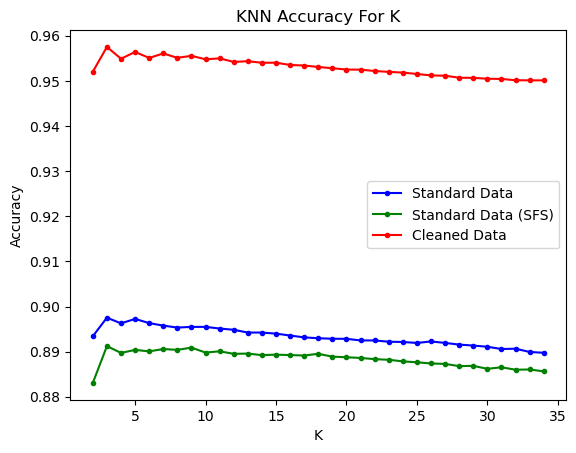

In [114]:
print(f'Optimal K Neighbors: {(np.argmax(knn_results_sfs) + 2)}')
print('Accuracy:', np.max(knn_results_sfs))

x_range = range(2, k_est + 5)
plt.plot(x_range, knn_results, marker = '.', color = 'b', label = 'Standard Data')
plt.plot(x_range, knn_results_sfs, marker = '.', color = 'g', label = 'Standard Data (SFS)')
plt.plot(x_range, knn_results_clean, marker = '.', color = 'r', label = 'Cleaned Data')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Accuracy For K')
plt.savefig('WC_KNN_Comparison_Tuned.png')
plt.show()

#### Results: 
Initial implementation of the model yielded an accuracy of 89.75% with k = 3 for the standard dataset and an accuracy of 95.75% with k = 3 for the cleanded dataset. In an attempt to boost the standard accuracy scores, I used sequential feature selection with k = 3 to determine the optimal subset of features for classification. 

    SFS features: 'Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index',  'Visibility (km)', 'Cloud Cover Labels

SFS did not improve the accuracy of the model as it resulted with an accuracy of 89.12%. Given the simplicity of KNN, it is possible that this dataset may require a more complex model or a model that is able to better capture the complex relationships between attributes while still using outlying data.

Outlier removal significantly improved the accuracy of KNN and outlines its sensitivities.


#### SVM

In [122]:
data2 = df.copy()
data2_clean = df_clean.copy()

cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index',
       'Visibility (km)', 'Cloud Cover Labels',
       'Season Labels', 'Location Labels', 'Weather Type Labels']

data2 = data2[cols]
data2_clean = data2_clean[cols]

# standard 
x = data2.drop('Weather Type Labels', axis = 1)
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
y = data2['Weather Type Labels']

# clean
x_clean = data2_clean.drop('Weather Type Labels', axis = 1)
x_scaled_clean = scaler.fit_transform(x_clean)
x_clean = pd.DataFrame(x_scaled_clean, columns = x_clean.columns)
y_clean = data2_clean['Weather Type Labels']

In [126]:
def pca_df(X, Y): 
    pca = PCA(n_components = 2)
    x_pca = pca.fit_transform(X)

    # frame of principle variables and mapped clusters to target variables 
    df_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2'])
    df_pca['Label'] = Y.values

    return df_pca

In [45]:
def svc_grid_search(X, Y): 
    # create a dictionary of possible parameters
    params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'class_weight': ['balanced', None],
              'decision_function_shape': ['ovo'], 
              'break_ties': [True, False],
              'kernel': ['rbf']}
    
    # search for best params
    grid = GridSearchCV(SVC(), params_grid).fit(X, Y)
    
    return(grid.best_params_)

In [46]:
# sfs feature selection function
# return selected fearutes and model accuracy of svc model using sequential feature selection
# sfs implemented with a range of features, min_feature - max_feature
def svc_sfs_selection(X, Y, min_feature, max_feature):
    svc = SVC(kernel = 'rbf')
    model_accuracy = []
    selected_features = []
    
    for i in range(min_feature, max_feature):
        # select features for svc
        sfs = SequentialFeatureSelector(svc, n_features_to_select = i)
        sfs.fit(X, Y)
        features = X.columns[sfs.get_support()]
        test_features = X[features]
        
        # append feature names to selected features
        selected_features.append(features)

        # split data and train model
        x_train, x_test, y_train, y_test = train_test_split(test_features, Y, test_size = 0.3, random_state = 16)
        svc.fit(x_train, y_train)

        y_pred = svc.predict(x_test)
        model_accuracy.append(accuracy_score(y_test, y_pred))

    return selected_features, model_accuracy

In [47]:
# use rbf given complex relationship of weather data

# svc with standard data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 16)
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print('SVC Accuracy (Standard Data)')
print(accuracy_score(y_test, y_pred))

# search for best hyperparams 
print()
params = svc_grid_search(x_train, y_train)
print(params)
svc = SVC(**params)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print('SVC Accuracy (Standard Data, Tuned Hyperparameters)')
print(accuracy_score(y_test, y_pred))


# svc with cleaned data
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_clean, y_clean, test_size = 0.3, random_state = 16)
svc = SVC(kernel = 'rbf')
svc.fit(x_train_c, y_train_c)
y_pred_c = svc.predict(x_test_c)

print('\nSVC Accuracy (Cleaned Data)')
print(accuracy_score(y_test_c, y_pred_c))

# search for best hyperparams 
print()
params_c = svc_grid_search(x_train_c, y_train_c)
print(params_c)
svc = SVC(**params_c)
svc.fit(x_train_c, y_train_c)
y_pred_c = svc.predict(x_test_c)

print('SVC Accuracy (Standard Data, Tuned Hyperparameters)')
print(accuracy_score(y_test_c, y_pred_c))

SVC Accuracy (Standard Data)
0.9073232323232323

{'C': 1, 'break_ties': False, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}
SVC Accuracy (Standard Data, Tuned Hyperparameters)
0.9073232323232323

SVC Accuracy (Cleaned Data)
0.9668760708166761

{'C': 100, 'break_ties': False, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'rbf'}
SVC Accuracy (Standard Data, Tuned Hyperparameters)
0.9680182752712736


##### Observations: 

The standard model gains no accuracy increase by tuning the hyperparameters. This suggests that the standard model performs optimally with the 'default' settings. However, tuning hyperparameters on the cleaned dataset improved accuracy slightly to 96.80% from 96.69%. The higher C value of 100 indicates a preference for classifying training examples correctly, even if the decision boundary becomes less smooth. The lower gamma value of 0.01 implies a broader reach of influence for each training example, leading to a smoother decision boundary. This configuration seems to enhance the model's ability to generalize better on the cleaned data.

In [48]:
# standard data
sfs_features, sfs_accuracy = svc_sfs_selection(x, y, 5, 10)

# select best features from sfs 
max_index = np.argmax(sfs_accuracy)
best_features = sfs_features[max_index]
print('Best Features:\n', best_features)

# select best feature cols
x_sfs = x[best_features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 16)
svc = SVC(**params)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print('SFS SVC Accuracy (Standard Data)\n')
print(accuracy_score(y_test, y_pred))

Best Features:
 Index(['Temperature', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover Labels', 'Season Labels'],
      dtype='object')
SFS SVC Accuracy (Standard Data)

0.9073232323232323


In [49]:
# cleaned data
sfs_features_clean, sfs_accuracy_clean = svc_sfs_selection(x_clean, y_clean, 5, 10)

# select best features from sfs 
max_index_clean = np.argmax(sfs_accuracy_clean)
best_features_clean = sfs_features[max_index_clean]
print('Best Features:\n', best_features_clean)

# select best feature cols
x_clean_sfs = x_clean[best_features_clean]

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_clean, y_clean, test_size = 0.3, random_state = 16)
svc = SVC(**params_c)
svc.fit(x_train_c, y_train_c)
y_pred_c = svc.predict(x_test_c)

print('SFS SVC Accuracy (Cleaned Data)')
print(accuracy_score(y_test_c, y_pred_c))

Best Features:
 Index(['Temperature', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover Labels', 'Season Labels'],
      dtype='object')
SFS SVC Accuracy (Cleaned Data)
0.9680182752712736


##### Observations: 

Sequential feature selection does not improve model accuracy for either datasets. However, Humidity is removed from each attribute set. This could indicate that humidity is highly correlated to other attributes within the dataset. 

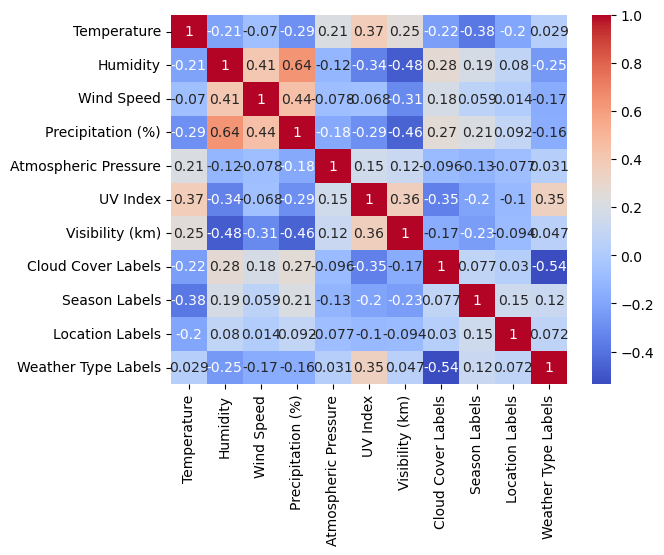

In [142]:
# show correlation scores
correlations = data2.corr()
sns.heatmap(correlations, annot = True, cmap = 'coolwarm')
plt.savefig('WC_Corr.png')
plt.show()

In [70]:
# check for high multicolinearity with variance inflation factor
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_data

,Feature,VIF
0,Temperature,1.405072
1,Humidity,1.943444
2,Wind Speed,1.340761
3,Precipitation (%),1.980764
4,Atmospheric Pressure,1.069134
5,UV Index,1.436985
6,Visibility (km),1.492405
7,Cloud Cover Labels,1.211957
8,Season Labels,1.212139
9,Location Labels,1.050672


##### Observations:

Humidity has the highest correlation values of the attributes with Wind Speed (0.41) and Precipitation (%) (0.64). The relationship between Humidity and Precipitation is stronger, however, this relationship might be expected as humid conditions often precede or accompany precipitation.

Exploring VIF data does not lead to any significant findings as all of the values are not particularly high. 

While neither of these findings are highly indicative of multicolinearity within the dataset, removing Humidity could be improving model performance through noise reduction. 

In [132]:
def plot_decision_boundaries(model, x, y, title):
    # create a grid of points to plot the decision boundaries
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    # Predict the label for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize = (10, 6))
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

    # Plot the training points
    scatter = plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, cmap = plt.cm.coolwarm, edgecolor = 'k', s = 20)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Add a legend
    labels = np.unique(y)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.coolwarm(i / len(labels)), markersize=8) for i in range(len(labels))]
    plt.legend(handles, labels, title="Labels", loc='best')

    plt.show()

In [128]:
# primary component decomp for visualization
pca_standard = pca_df(x, y)
pca_clean = pca_df(x_clean, y_clean)

In [52]:
# fit pca data to svc models with tuned hyper parmeters
svc_pca = SVC(**params)
svc_pca.fit(pca_standard[['PC1', 'PC2']], pca_standard['Label'])

svc_pca_clean = SVC(**params_c)
svc_pca_clean.fit(pca_clean[['PC1', 'PC2']], pca_clean['Label'])

SVC(C=100, decision_function_shape='ovo', gamma=0.01)

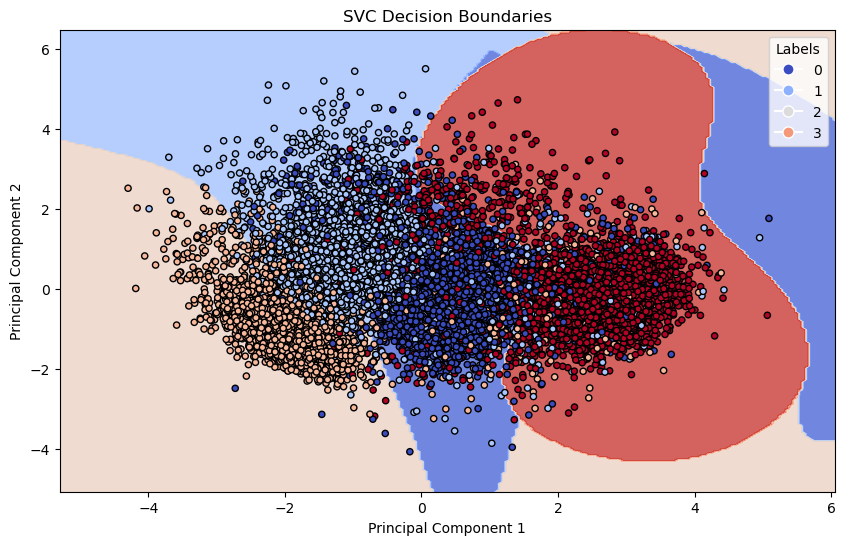

<Figure size 640x480 with 0 Axes>

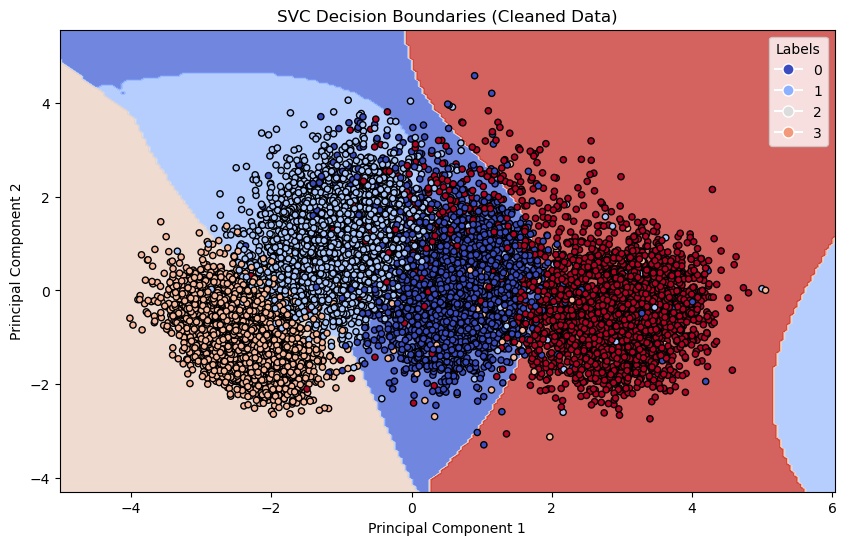

<Figure size 640x480 with 0 Axes>

In [56]:
# Plot decision boundaries for the standard PCA-transformed data
plot_decision_boundaries(svc_pca, pca_standard[['PC1', 'PC2']], pca_standard['Label'], "SVC Decision Boundaries")
plt.savefig('WC_Boundaries.png')
plt.show()

# Plot decision boundaries for the cleaned PCA-transformed data
plot_decision_boundaries(svc_pca_clean, pca_clean[['PC1', 'PC2']], pca_clean['Label'], "SVC Decision Boundaries (Cleaned Data)")
plt.savefig('WC_Boundaries_Clean.png')
plt.show()

In [130]:
# decision boundaries for knn
# fit pca data to knn models with 3 neighbors
knn_pca = KNeighborsClassifier(n_neighbors = 3)
knn_pca.fit(pca_standard[['PC1', 'PC2']], pca_standard['Label'])

knn_pca_clean = KNeighborsClassifier(n_neighbors = 3)
knn_pca_clean.fit(pca_clean[['PC1', 'PC2']], pca_clean['Label'])

KNeighborsClassifier(n_neighbors=3)

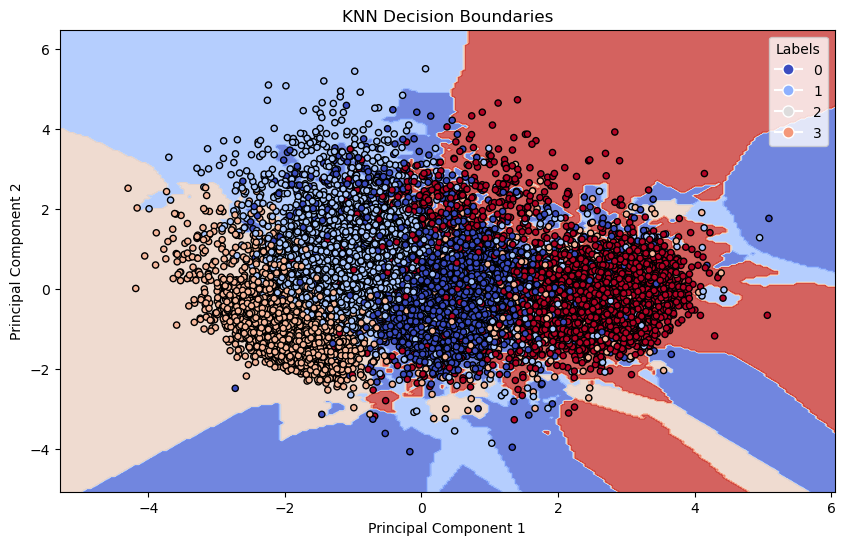

<Figure size 640x480 with 0 Axes>

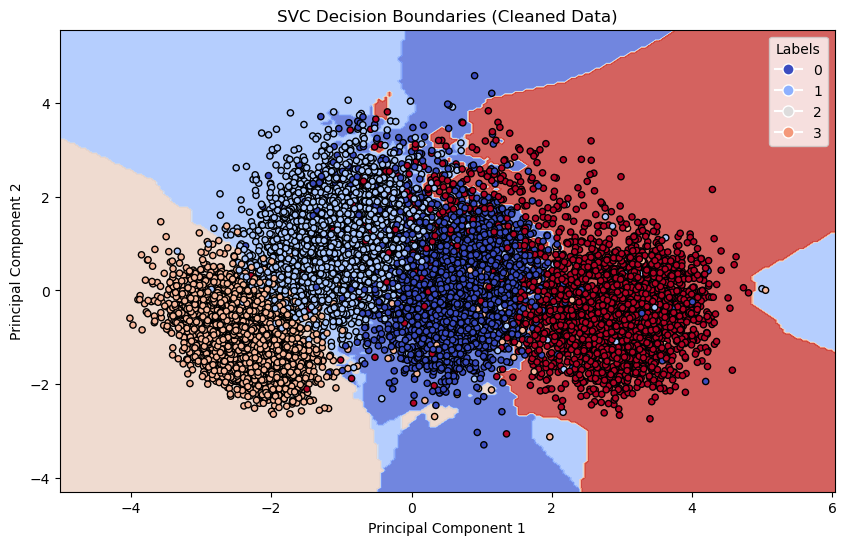

<Figure size 640x480 with 0 Axes>

In [134]:
# plot decision boundaries for the standard PCA-transformed data
plot_decision_boundaries(knn_pca, pca_standard[['PC1', 'PC2']], pca_standard['Label'], "KNN Decision Boundaries")
plt.savefig('WC_Boundaries_KNN.png')
plt.show()

# plot decision boundaries for the cleaned PCA-transformed data
plot_decision_boundaries(knn_pca_clean, pca_clean[['PC1', 'PC2']], pca_clean['Label'], "SVC Decision Boundaries (Cleaned Data)")
plt.savefig('WC_Boundaries_Clean_KNN.png')
plt.show()